<a href="https://colab.research.google.com/github/LeeJungtae/TensorflowProject1/blob/main/TensorflowProject2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

운동화나 셔츠 등의 옷 이미지들을 분류하는 신경망 모델 훈련.

In [1]:
# tensorflow와 tf.keras 임포트
import tensorflow as tf
from tensorflow import keras

# 헬퍼(Helper) 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt

# 현재 텐서플로우 버전
print(tf.__version__)

2.4.1


10개의 범주(category)와 70,000개의 흑백이미지로 구성된
패션 MNIST 데이터셋 사용.

네트워크를 훈련하는데 60,000개의 이미지 사용.\
그 다음 네트워크가 얼마나 정확하게 이미지를 분류하는지 10,000개의 이미지로 평가.

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


load_data() 함수 호출 시 네 개의 NumPy(넘파이) 배열 반환

train_images와 train_labels 배열은 모델 학습에 사용되는 '훈련 세트'.\
test_images와 test_labels 배열은 모델 테스트에 사용되는 '테스트 세트'.

이미지는 28x28 크기의 넘파이 배열이며 픽셀 값은 0과 255 사이.\
레이블은 0에서 9까지의 정수 배열.

In [5]:
class_names = [
               "T-shirt/top",
               "Trouser",
               "Pullover",
               "Dress",
               "Coat",
               "Sandal",
               "Shirt",
               "Sneaker",
               "Bag",
               "Ankle boot"
]

훈련 세트에는 60,000개의 이미지가 있으며, 각 이미지는 28x28 픽셀로 표현됨.

In [6]:
train_images.shape

(60000, 28, 28)

훈련 세트에 있는 레이블도 60,000개.

In [7]:
len(train_labels)

60000

각 레이블은 0과 9 사이의 정수입니다.

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

테스트 세트는 10,000개의 이미지가 있으며 각각 28x28 픽셀로 표현.

In [9]:
test_images.shape

(10000, 28, 28)

테스트 세트 또한 10,000개의 레이블을 포함하고 있음.

In [10]:
len(test_labels)

10000

네트워크 훈련 전, 데이터 전처리 필요.\
훈련 세트의 첫 번째 이미지의 픽셀 값은 0~255 사이.

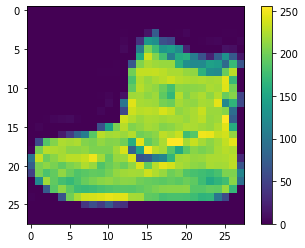

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

신경망 모델 주입 전 값의 범위를 0~1로 조정.\
255로 나눠야 함.\
훈련 세트와 테스트 세트 모두 동일한 방식으로 전처리하는 것이 중요함.

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

훈련 세트에서 처음 25개 이미지와 아래에 클래스 이름 출력.

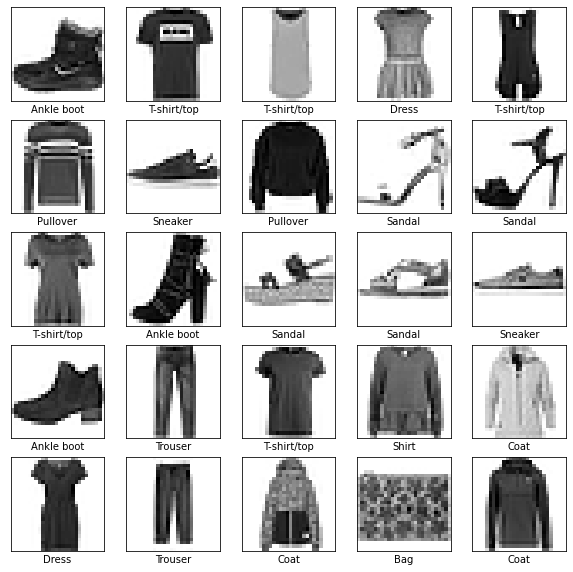

In [13]:
plt.figure(figsize=(10, 10))
# 5행 5열
for i in range(25):
  plt.subplot(5, 5, i + 1)
  # x축 표시 제거
  plt.xticks([])
  # y축 표시 제거
  plt.yticks([])
  # 격자 표시 제거
  plt.grid(False)
  # i번째 이미지 바이너리 형태 출력
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  # 각 서브 플롯의 이름 출력
  plt.xlabel(class_names[train_labels[i]])
plt.show()

신경망 모델을 만들려면 모델의 층을 구성한 다음 모델을 컴파일해야 함\

신경망의 기본 요소는 층(layer)이며 주입된 데이터에서 표현을 추출.\
대부분의 딥러닝은 간단한 층을 연결하여 구성함.

In [14]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28, 28)),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation='softmax')
])

이 네트워크의 첫 번째 층인 tk.keras.layers.Flatten은\
2차원 배열(28 x 28 픽셀)의 이미지 포맷을 28 * 28 = 784 픽셀의 1차원 배열로 변환함.\
이미지에 있는 픽셀의 행을 펼쳐서 일렬로 늘림.\
학습되는 가중치는 없으며 데이터를 변환하기만 함.\

픽셀을 펼친 후에는 두 개의 tk.keras.layers.Dense 층이 연속되어 연결됨.\
해당 층을 밀집 연결(densely-connected) 또는 완전 연결(fully-connected) 층이라고 부름.\
첫 번째 Dense 층은 128개의 노드(또는 뉴런)를 가짐.\
두 번째 (마지막) 층은 10개의 노드의 소프트맥스(softmax) 층임.\
이 층은 10개의 확률을 반환하며 반환된 값의 총합은 1.\
각 노드는 현재 이미지가 10개의 클래스 중 하나에 속할 확률을 출력함.

모델 훈련 전에 필요한 몇 가지 설정이 컴파일 단계 시 추가됨.

(1) 손실 함수(Loss function)
- 훈련하는 동안 오차를 측정함.
- 모델의 학습이 올바른 방향으로 향하도록 이 함수를 최소화해야 함.

(2) 옵티마이저(Optimizer)
- 데이터와 손실 함수를 바탕으로 모델의 업데이트 방법을 결정함.

(3) 지표(Metrics)
- 훈련 단계와 테스트 단계를 모니터링하기 위해 사용함.

In [15]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

신경망 모델을 훈련하는 단계는 다음과 같다.

(1) 훈련 데이터를 모델에 주입\
(2) 모델이 이미지와 레이블을 매핑하는 방법을 배움\
(3) 테스트 세트에 대한 모델의 예측을 만듦

훈련을 시작하기 위해 model.fit 메서드를 호출하면 모델이 훈련 데이터를 학습함.

In [16]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6293 - accuracy: 0.7827
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3855 - accuracy: 0.8616
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3390 - accuracy: 0.8769
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3085 - accuracy: 0.8874
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2910 - accuracy: 0.8936


모델이 훈련되면서 손실과 정확도가 출력됨.\
위의 모델은 훈련 세트에서 약 0.88(88%) 정도의 정확도를 달성함.

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\n테스트 정확도:", test_acc)

313/313 - 0s - loss: 0.3528 - accuracy: 0.8722

테스트 정확도: 0.8722000122070312


훈련 세트의 정확도와 테스트 세트의 정확도 사이의 차이는 과대적합(overfitting) 때문.\
과대적합은 머신러닝 모델이 훈련 데이터보다 새로운 데이터에서 성능이 낮아지는 현상을 의미함.

In [19]:
predictions = model.predict(test_images)
predictions[0]

array([1.36612186e-06, 2.14135525e-06, 9.93767799e-07, 2.03004689e-08,
       1.55317377e-06, 7.48967286e-03, 6.54113910e-06, 4.62590121e-02,
       1.03640305e-05, 9.46228266e-01], dtype=float32)

이미지 예측 중 첫 번째 예측을 확인한 결과.\
이 예측은 10개의 숫자 배열로 나타남.\
이 값은 10개의 옷 품목에 상응하는 모델의 신뢰도(confidence)를 나타냄.

In [20]:
np.argmax(predictions[0])

9

In [21]:
test_labels[0]

9

두 값이 일치하는 것을 볼 수 있음.

In [22]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100 * np.max(predictions_array),
                                       class_names[true_label]),
             color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color='#777777')
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

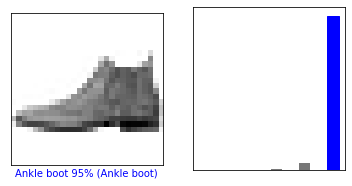

In [24]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

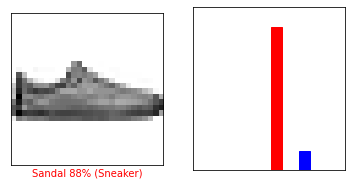

In [25]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions, test_labels)
plt.show()

올바르게 예측된 레이블은 파란색이고 잘못 예측된 레이블은 빨강색.\
숫자는 예측 레이블의 신뢰도 퍼센트(100점 만점).\
신뢰도 점수가 높을 때도 잘못 예측할 수 있음.

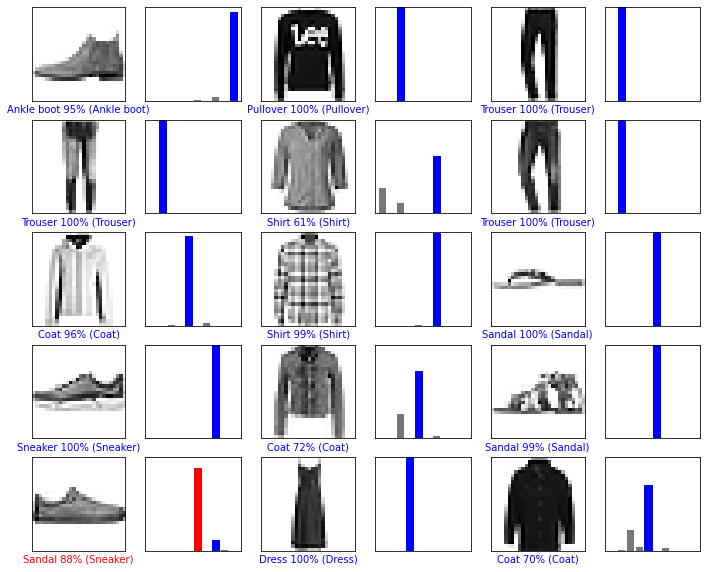

In [26]:
# 처음 X 개의 테스트 이미지와 예측 레이블, 진짜 레이블을 출력
# 올바른 예측은 파란색, 잘못된 예측은 빨간색으로 나타남
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
  plot_value_array(i, predictions, test_labels)
plt.show()

훈련된 모델을 사용하여 한 이미지에 대한 예측 생성.

In [27]:
# 테스트 세트에서 이미지 하나를 선택함
img = test_images[0]
print(img.shape)

(28, 28)


tk.keras 모델은 2차원 배열로 만들어야 함.

In [28]:
# 이미지 하나만 사용할 때도 배치에 추가함.
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


이미지 예측 생성.

In [29]:
predictions_single = model.predict(img)

print(predictions_single)

[[1.36612186e-06 2.14135525e-06 9.93765866e-07 2.03004689e-08
  1.55317684e-06 7.48968357e-03 6.54113910e-06 4.62590344e-02
  1.03640305e-05 9.46228266e-01]]


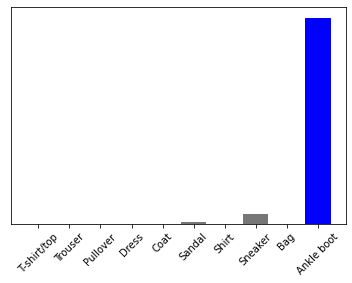

In [31]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

model.predict는 2차원 넘파이 배열을 반환하므로 첫 번째 이미지의 예측을 선택함

In [32]:
np.argmax(predictions_single[0])

9